['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


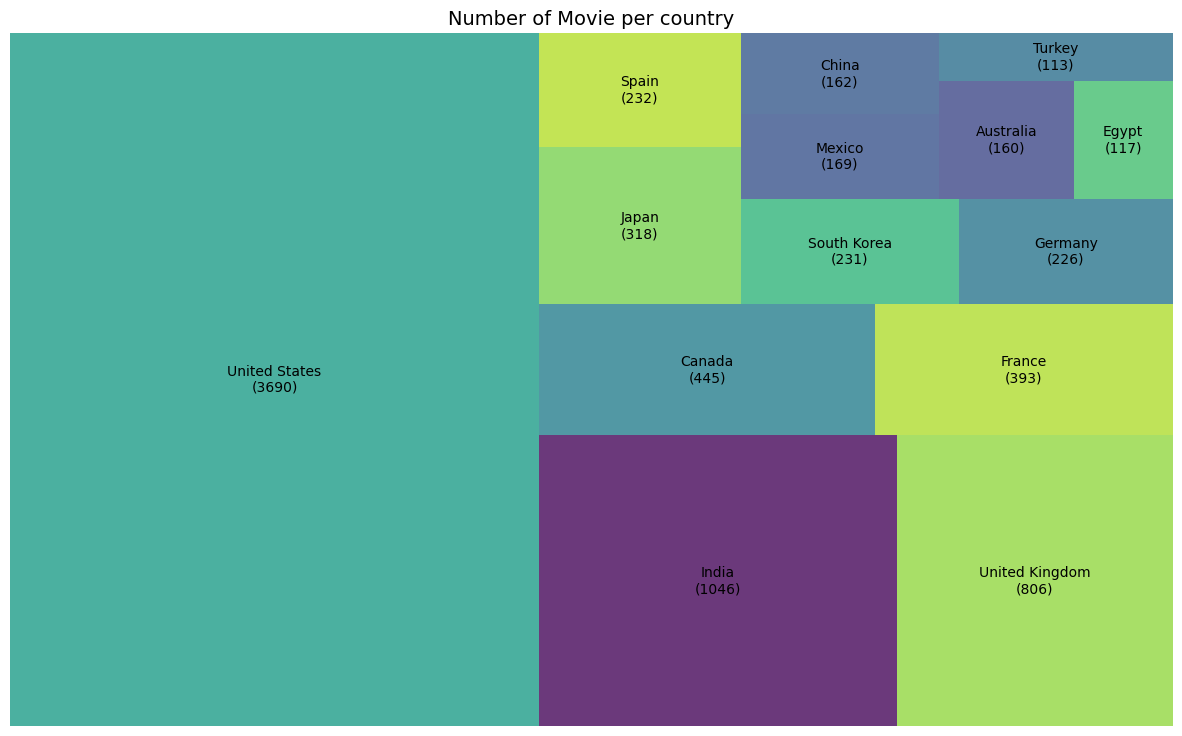

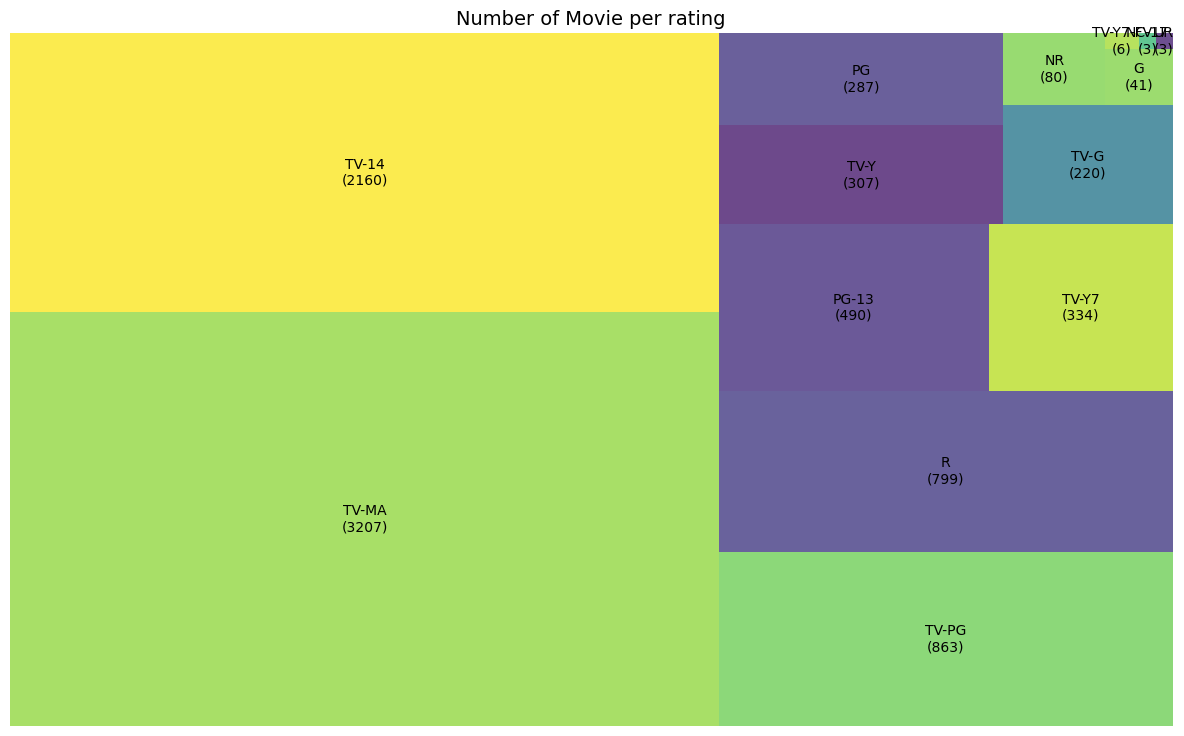

In [36]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import squarify

# Declaration
# Exploratory Data Analysis (EDA) - Tree Map Total Movie Per Context
data = pd.read_csv("netflix_titles.csv")

print(data['rating'].unique())

context_col = ['country', 'rating']
def clean_country(countries):
    return [country.strip() for country in countries.split(',')] if isinstance(countries, str) else [countries]

for dt in context_col:
    if dt == 'country':
        expanded_countries = data[dt].apply(clean_country)
        expanded_countries = expanded_countries.explode().reset_index(drop=True)  
        # Total Country after separate by comma
        total_context = expanded_countries.value_counts().reset_index()
        total_context.columns = [dt, 'show_id']  

        # Sort
        total_context = total_context.sort_values(by='show_id', ascending=False).head(14)
    elif dt == 'rating': 
        # Remove rows where the 'rating' contains the word "min"
        filtered_data = data[~data[dt].str.contains('min', na=False)]
        total_context = filtered_data.groupby(dt)['show_id'].count().reset_index().head(14)
            
        # Sort 
        total_context = total_context.sort_values(by='show_id', ascending=False)
        
    # Extract
    sizes = total_context['show_id']
    labels = total_context.apply(lambda x: f"{x[dt]}\n({x['show_id']})", axis=1)
        
    # Plot Tree Map
    plt.figure(figsize=(15, 9))
    squarify.plot(sizes=sizes, label=labels, alpha=0.8)
    plt.title(f"Number of Movie per {dt}", fontsize=14)
    plt.axis('off')
    plt.show()